In [1]:
# Import various necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.time_series import generate_damped_RW


/Users/Jackster/anaconda/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


# AR(1) = Random Walk or Brownian Motion

In [2]:
#np.random.seed(92)
mean = 0
std = 0.5 
num_samples = 50

samples = np.random.normal(mean, std, size=num_samples)
RW = np.zeros(num_samples)

RW[0] = samples[0]
for i in range(1,num_samples):
    RW[i] = RW[i-1]+samples[i]

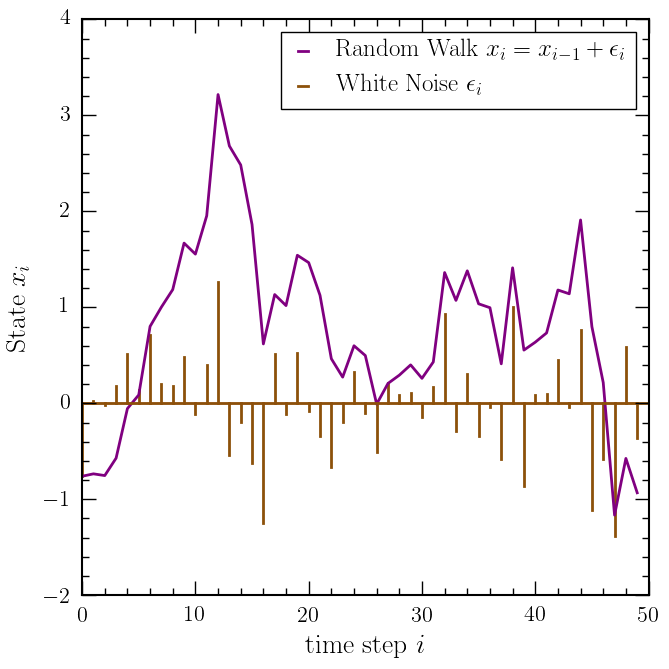

In [4]:
import richardsplot as rplot
markerline, stemlines, baseline  = plt.stem(np.arange(0,len(samples)), samples,linefmt="-", markerfmt=" ", linewidth = 20)
plt.setp(stemlines, 'color',"#8c510a", linewidth = 2)
plt.plot(np.arange(0,len(samples)), RW,linewidth = 2, c = "purple", label = r'Random Walk $x_i = x_{i-1}+\epsilon_i$')
plt.plot([0,num_samples],[0,0],c = "#8c510a",linewidth = 2, label =r"White Noise $\epsilon_i$" )
plt.xlim([0,num_samples])
plt.legend(loc = "upper right",fontsize = 18,markerscale = 0, handlelength =1)
plt.xlabel("time step $i$", fontsize = 20)
plt.ylabel(r"State $x_{i}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("whiteNoise.pdf", dpi = 300)

# Moving Average Process of Order 1

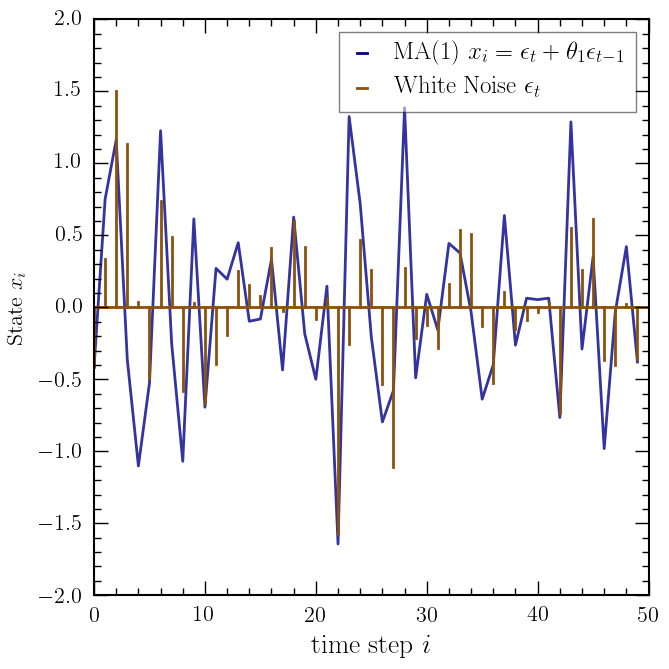

In [8]:
lengthT = 50

#np.random.seed(1)
def RWprocess(lengthT):
    n_samples = int(lengthT)
    a = -1.
    w = np.random.normal(mean, std, size=n_samples)
    x = np.zeros(shape=n_samples)
    x[0] = w[0]
    for t in range(1,n_samples):
        x[t] = a*w[t-1]+w[t]
    return w,x

w,x = RWprocess(lengthT)

#w = np.random.normal(size=l , scale=1.)
plt.plot(0,0, c = "darkblue",linewidth = 2, label = r"MA(1) $x_i=\epsilon_{t}+\theta_1 \epsilon_{t-1}$")
plt.plot(0,0 ,c = "#8c510a",linewidth = 2, label = r"White Noise $\epsilon_{t}$")

plt.xlim(0,len( w[:lengthT]))
plt.legend(loc = "upper right", fontsize = 18, handlelength = 1, framealpha = 0.5)

plt.plot(np.arange(lengthT), x[:lengthT], c = "darkblue", linewidth = 2, alpha = 0.8)
markerline, stemlines, baseline  = plt.stem(np.arange(lengthT), w[:lengthT],linefmt="-",alpha = 0.5, markerfmt=" ")

#markerline, stemlines, baseline  = plt.stem(np.arange(lengthT), w[:lengthT]**2/9,linefmt="-",alpha = 0.5, markerfmt=" ")
plt.setp(stemlines, 'color',"#8c510a",linewidth = 2, alpha = 1.0)
plt.plot([0,num_samples],[0,0],c = "#8c510a",linewidth = 2)

#markerline, stemlines2, baseline  = plt.stem(np.arange(lengthT), x[:lengthT]**2/9,linefmt="-", markerfmt=" ")
#plt.setp(stemlines2, 'color',"blue",alpha = 0.5,linewidth = 2)
plt.xlabel(r"time step $i$", fontsize = 20)
plt.ylabel(r"State $x_i$")
plt.tight_layout()
plt.savefig("CorrelatedNoise.pdf", dpi = 300)

# Discrete AR(1) Response

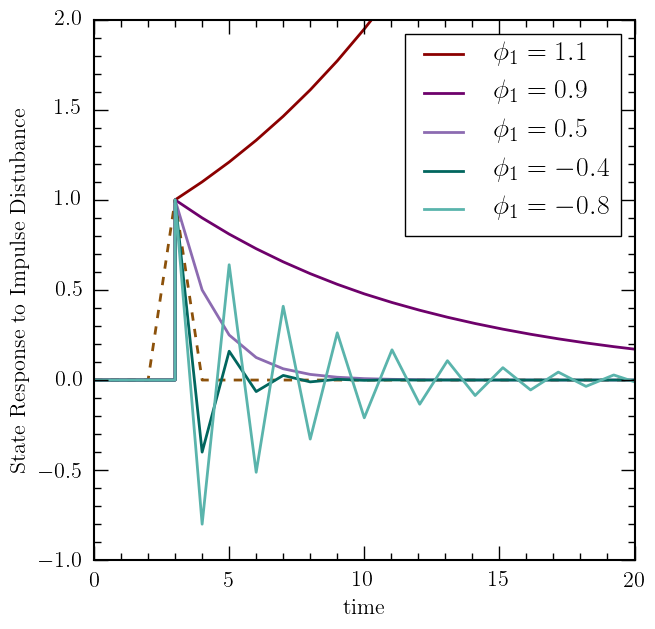

In [12]:
colors_custom = ['darkred','#6e016b','#8c6bb1','#01665e','#5ab4ac']
#AR(1) for a single shock
#Plot a few coefficients to see what effect they have
phi = np.array([1.1,0.9,0.5,-0.4,-0.8])

#Time steps for x-axis
#for step function
t1 = np.array([0,1,2,3,3,4,5,6,7,8,9])
t2 = np.linspace(10,50,num=40)
t =  np.concatenate((t1,t2))

#Just a single shock in 4th epoch
epsilon1 = np.array([0,0,0,0,1,0,0,0,0,0,0])
epsilon2 = np.zeros(len(t2))
epsilon = np.concatenate((epsilon1,epsilon2))


#Placeholder for flux values
X = np.zeros(len(epsilon))

#print(t)
#offset helps view that the impulse happens and the AR processes change instantanelously
plt.plot(t[1:]-1,epsilon[0:-1],'--', color = '#8c510a',linewidth = 2)

for j,p in enumerate(phi):
    X = np.zeros(len(epsilon))
    for i in range(len(epsilon)):
        X[i] = phi[j]*X[i-1]+epsilon[i]
    plt.plot(t,X,label=r'$\phi_1 = %.1f$'%(phi[j]),color =colors_custom[j], linewidth = 2 )
plt.legend(loc='upper right', fontsize = 20)
plt.xlabel('time')
plt.ylim([-1,2])
plt.xlim([0,20])
plt.ylabel('State Response to Impulse Distubance')
plt.savefig('ar_1_ImpulseDistubance.pdf', dpi = 200)

# Discrete AR(2) Response

[  0.           1.           2.           3.           3.           4.           5.
   6.           7.           8.           9.          10.          11.02564103
  12.05128205  13.07692308  14.1025641   15.12820513  16.15384615
  17.17948718  18.20512821  19.23076923  20.25641026  21.28205128
  22.30769231  23.33333333  24.35897436  25.38461538  26.41025641
  27.43589744  28.46153846  29.48717949  30.51282051  31.53846154
  32.56410256  33.58974359  34.61538462  35.64102564  36.66666667
  37.69230769  38.71794872  39.74358974  40.76923077  41.79487179
  42.82051282  43.84615385  44.87179487  45.8974359   46.92307692
  47.94871795  48.97435897  50.        ]


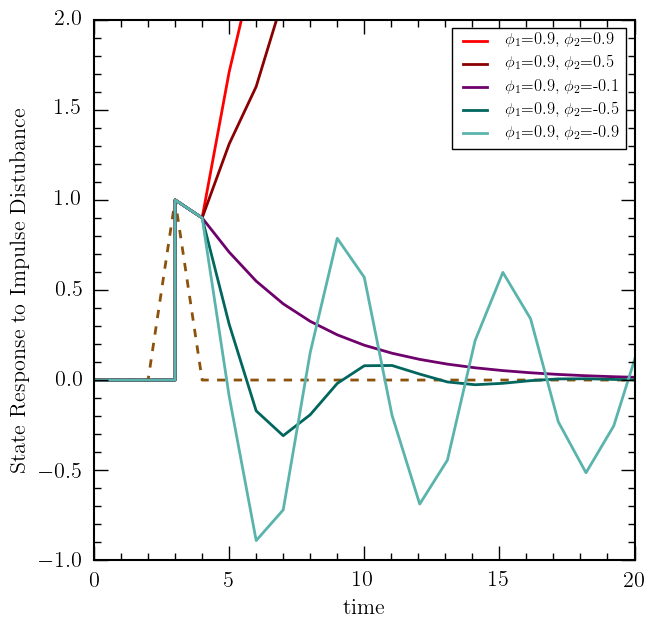

In [14]:
colors_custom2 = ['red','darkred','#6e016b','#01665e','#5ab4ac']
#AR(2) for a single shock
#Plot a few coefficients to see what effect they have
#First coefficient is always the same
phi = np.array([0.9,0.9,0.9,0.9,0.9])
phi2 = np.array([0.9,0.5,-0.1,-0.5,-0.9])

#Time steps for x-axis
#for step function
t1 = np.array([0,1,2,3,3,4,5,6,7,8,9])
t2 = np.linspace(10,50,num=40)
t =  np.concatenate((t1,t2))

#Just a single shock in 4th epoch
#epsilon = np.array([0,0,0,1,0,0,0,0,0,0])
epsilon1 = np.array([0,0,0,0,1,0,0,0,0,0,0])
epsilon2 = np.zeros(len(t2))
epsilon = np.concatenate((epsilon1,epsilon2))

#Placeholder for flux values
X = np.zeros(len(epsilon))

print(t)
#offset helps view that the impulse happens and the AR processes change instantanelously
plt.plot(t[1:]-1,epsilon[0:-1],'--', color = '#8c510a',linewidth = 2)

for j,p in enumerate(phi):
    X = np.zeros(len(epsilon))
    for i in range(len(epsilon)):
        X[i] = phi[j]*X[i-1]+phi2[j]*X[i-2]+epsilon[i]
    plt.plot(t,X,label='$\phi_1$=%.1f, $\phi_2$=%.1f'%(phi[j],phi2[j]),color =colors_custom2[j], linewidth = 2)

plt.legend(loc ='upper right')
plt.xlabel('time')
plt.ylim([-1,2])
plt.xlim([0,20])
plt.ylabel('State Response to Impulse Distubance')
plt.savefig('ar_2_ImpulseDistubance.pdf', dpi = 200)

# Power Spectrum of an MA(1) Vs. White Noise

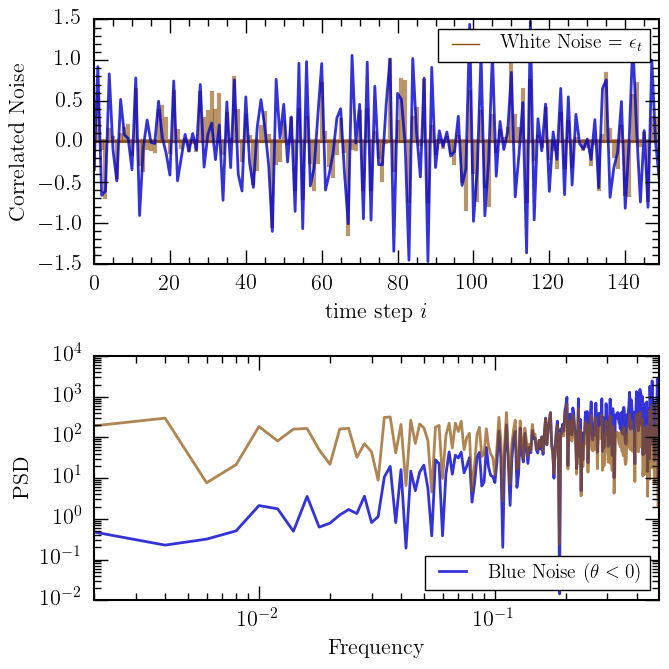

In [15]:
#import pyfits
from scipy.fftpack import fft, rfft, fftfreq
import pylab as plt

def powerSpectrum(w,ma1):
    n = len(ma1)
    num_samples = 150
    x,y, y2  = np.arange(n),w,ma1
    #y = y - y.mean()

    W = fftfreq(n, d=(x[1]-x[0]))
    plt.subplot(2,1,1)
    plt.plot(0,0 ,c = "#8c510a", label = r"White Noise $=\epsilon_{t}$", linewidth = 1)

    markerline, stemlines, baseline  = plt.stem(x[:150],y[:150]/y[:150].max(),linefmt="-", markerfmt=" ")
    plt.setp(stemlines, 'color',"#8c510a",linewidth = 3, alpha = 0.6)
    plt.plot([0,num_samples],[0,0],c = "#8c510a",linewidth = 2)
    plt.plot(x[:150],y2[:150]/y[:150].max(),color = 'mediumblue',alpha = 0.8, linewidth =2)
    #plt.plot(x[:150],y[:150]/y[:150].max(), color = "#8c510a", alpha = 0.8)
    plt.xlim(x[:150].min(),x[:150].max())
    plt.ylabel('Correlated Noise')

    plt.xlabel('time step $i$')
    plt.legend(scatterpoints = 1, fontsize = 14)

    
    order = np.argsort(W)
    f_signal = fft(y)
    f_signal2 = fft(y2)
    plt.subplot(2,1,2)
    plt.plot(W[order], abs(f_signal2[order])**2, color = 'mediumblue',alpha = 0.8,linewidth = 2, label = r"Blue Noise ($\theta < 0$)")

    plt.plot(W[order], abs(f_signal[order])**2, color = "#8c510a",alpha = 0.7, linewidth = 2)

    plt.ylabel('PSD')
    plt.legend(loc = "lower right",fontsize = 14)

    plt.xlabel('Frequency')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(W[order].min(), W[order].max())
    plt.tight_layout()
    #plt.savefig("CorrelatedNoise.png", dpi = 200)

w2,x2 = RWprocess(lengthT*10)    
powerSpectrum(w2,x2[:])

# Higher Order MA(q) aka Colored Noise Processes

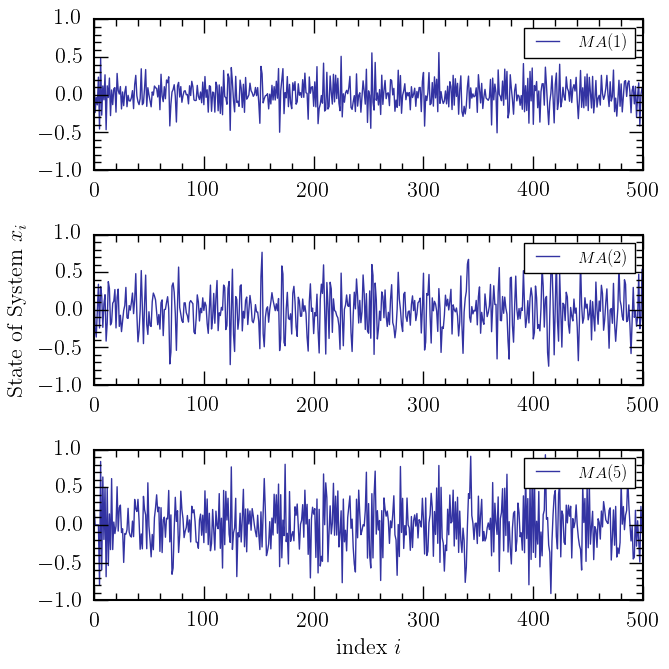

In [16]:
np.random.seed(1)
n_samples = int(500)
a = -0.5
b = +1.2
c,d,e = -0.3,-0.6,-0.8
x5 = np.zeros(shape=n_samples)
x2n = np.zeros(shape=n_samples)
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x[0],x2n[0],x5[0] = w[0],w[0],w[0]
for t in range(1,n_samples):
    x[t] = a*w[t-1]+w[t]
    x2n[t] =  a*w[t-1]+w[t]- b*w[t-2]
for t in range(5,n_samples):    
    x5[t] =  a*w[t-1]+w[t]+ b*w[t-2]+c*w[t-3]+d*w[t-4]+e*w[t-5]

plt.subplot(3,1,1)
plt.plot(np.arange(n_samples), x/6., color = 'darkblue',alpha = 0.8,label = r"$MA(1)$ ")  
plt.ylim(-1,1)
plt.legend(loc = "upper right")
plt.subplot(3,1,2)
plt.plot(np.arange(n_samples), x2n/6., color = 'darkblue',alpha = 0.8,label = r"$MA(2)$") 
plt.ylim(-1,1)
plt.ylabel("State of System $x_i$")
plt.legend(loc = "upper right")
plt.subplot(3,1,3)
plt.plot(np.arange(n_samples), x5/6., color = 'darkblue',alpha = 0.8,label = r"$MA(5)$") 
#plt.plot(xrange(n_samples), w, color = "#8c510a",alpha = 0.2, label = r"white noise") 
plt.ylim(-1,1)

plt.legend(loc = "upper right")
mablue = x5
plt.xlabel("index $i$")
plt.tight_layout()
#plt.ylim([-10,50])
#plt.savefig("MA_models.png", dpi = 200)

# Shades of Blue Noise and PSD

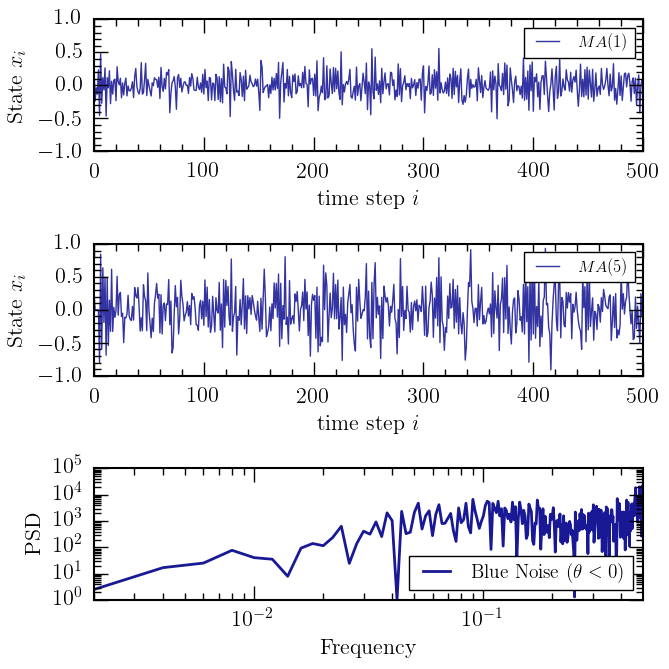

In [17]:
np.random.seed(1)
n_samples = int(500)
a = -0.5
b = +1.2
c,d,e = -0.3,-0.6,-0.8
x5 = np.zeros(shape=n_samples)
x2n = np.zeros(shape=n_samples)
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x[0],x2n[0],x5[0] = w[0],w[0],w[0]
for t in range(1,n_samples):
    x[t] = a*w[t-1]+w[t]
    x2n[t] =  a*w[t-1]+w[t]- b*w[t-2]
for t in range(5,n_samples):    
    x5[t] =  a*w[t-1]+w[t]+ b*w[t-2]+c*w[t-3]+d*w[t-4]+e*w[t-5]


    
plt.subplot(3,1,1)
plt.plot(np.arange(n_samples), x/6., color = 'darkblue',alpha = 0.8,label = r"$MA(1)$ ")  
plt.ylim(-1,1)
plt.xlim(0,500)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")


plt.legend(loc = "upper right")
plt.subplot(3,1,2)
#plt.plot(np.arange(n_samples), x2n/6., color = 'darkblue',alpha = 0.8,label = r"$MA(2)$") 
#plt.ylim(-1,1)
plt.ylabel("State $x_i$")
#plt.legend(loc = "upper right")
#plt.subplot(3,1,3)
plt.plot(np.arange(n_samples), x5/6., color = 'darkblue',alpha = 0.8,label = r"$MA(5)$") 
#plt.plot(xrange(n_samples), w, color = "#8c510a",alpha = 0.2, label = r"white noise") 
plt.ylim(-1,1)
plt.xlim(0,500)

plt.legend(loc = "upper right")
mablue = x5
plt.xlabel("time step $i$")

plt.subplot(3,1,3)


n = len(mablue)
num_samples = 150
x,y  = np.arange(n),x5

W = fftfreq(n, d=(x[1]-x[0]))
order = np.argsort(W)
f_signal2 = fft(y)

plt.plot(W[order], abs(f_signal2[order])**2, color = 'darkblue',alpha = 0.9,linewidth = 2, label = r"Blue Noise ($\theta < 0$)")
plt.ylabel('PSD')
plt.legend(loc = "lower right",fontsize = 14)
plt.xlabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlim(W[order].min(),W[order].max())
plt.tight_layout()
#plt.ylim([-10,50])
#plt.savefig("MA_models.pdf", dpi = 200)

# Shades of Red Noise and PSD

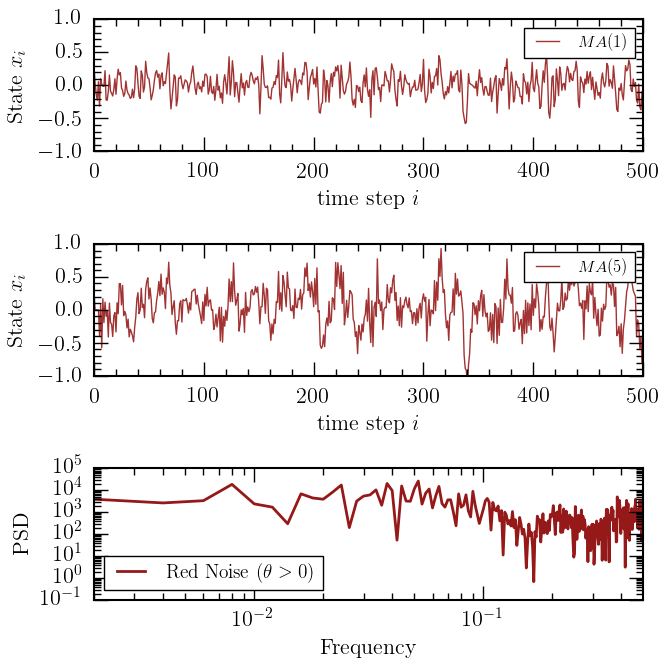

In [18]:
#positive
#plt.rcParams["figure.figsize"] = (10,10)
np.random.seed(1)
n_samples = int(500)
#a = -0.5
#b = -1.2
#c,d,e = -0.3,-0.6,-0.8
a = 0.5
b = 1.2
c,d,e = 0.3,0.6,0.8
x5 = np.zeros(shape=n_samples)
x2n = np.zeros(shape=n_samples)
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x[0],x2n[0],x5[0] = w[0],w[0],w[0]
for t in range(1,n_samples):
    x[t] = a*w[t-1]+w[t]
    x2n[t] =  a*w[t-1]+w[t]+ b*w[t-2]
for t in range(5,n_samples):    
    x5[t] =  a*w[t-1]+w[t]+ b*w[t-2]+c*w[t-3]+d*w[t-4]+e*w[t-5]

#plt.plot(xrange(n_samples), x2p, color = '#01665e',label = r"$\theta_1 = -0.5$ $\&$ $\theta_2 = +0.25$")
plt.subplot(3,1,1)
plt.xlim(0,500)

plt.plot(np.arange(n_samples), x/6., color = 'darkred',alpha = 0.8,label = r"$MA(1)$ ")  
plt.ylim(-1,1)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")
plt.legend(loc = "upper right")
plt.subplot(3,1,2)
#plt.plot(np.arange(n_samples), x2n/6., color = 'red',alpha = 0.8,label = r"$MA(2)$") 
#plt.ylim(-1,1)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")

#plt.legend(loc = "upper right")
plt.plot(np.arange(n_samples), x5/6., color = 'darkred',alpha = 0.8,label = r"$MA(5)$") 
plt.legend(loc = "upper right")
plt.xlim(0,500)

#plt.plot(xrange(n_samples), w, color = "#8c510a",alpha = 0.2, label = r"white noise") 
plt.ylim(-1,1)
plt.subplot(3,1,3)
mared = x5
n = len(mared)
num_samples = 150
x,y  = np.arange(n),x5

W = fftfreq(n, d=(x[1]-x[0]))
order = np.argsort(W)
f_signal2 = fft(y)

plt.plot(W[order], abs(f_signal2[order])**2, color = 'darkred',alpha = 0.9,linewidth = 2, label = r"Red Noise ($\theta > 0$)")
plt.ylabel('PSD')
plt.legend(loc = "lower left",fontsize = 14)
plt.xlabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlim(W[order].min(),W[order].max())
plt.tight_layout()
#plt.ylim([-10,50])
#plt.savefig("MA_models_red.png", dpi = 200)

# Red vs Blue, Sloped PSDs

(0.002, 0.498)

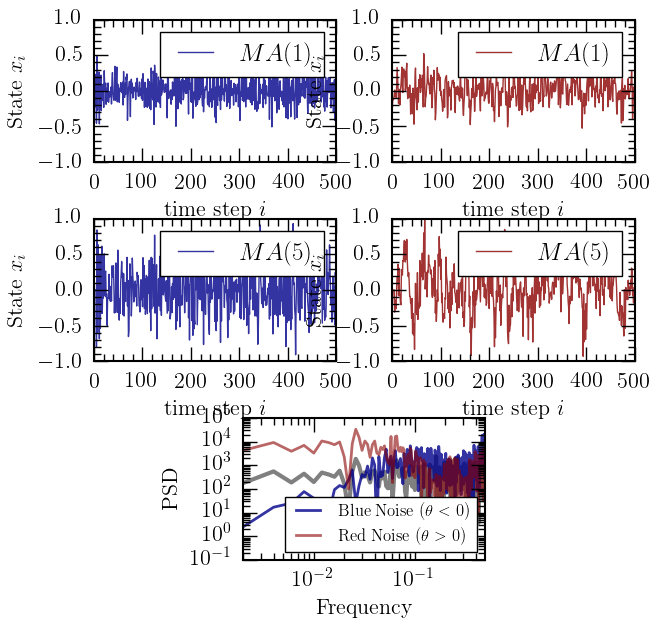

In [11]:
#plt.rcParams["figure.figsize"] = (15,10)
grid = plt.GridSpec(3, 4, wspace=0.6, hspace=0.4)
np.random.seed(1)
n_samples = int(500)
a = -0.5
b = +1.2
c,d,e = -0.3,-0.6,-0.8
x5 = np.zeros(shape=n_samples)
x2n = np.zeros(shape=n_samples)
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x[0],x2n[0],x5[0] = w[0],w[0],w[0]
for t in range(1,n_samples):
    x[t] = a*w[t-1]+w[t]
    x2n[t] =  a*w[t-1]+w[t]- b*w[t-2]
for t in range(5,n_samples):    
    x5[t] =  a*w[t-1]+w[t]+ b*w[t-2]+c*w[t-3]+d*w[t-4]+e*w[t-5]
#nrows, ncols, index
plt.subplot(grid[0, :2])
#plt.subplot(3,2,1)
plt.plot(np.arange(n_samples), x/6., color = 'darkblue',alpha = 0.8,label = r"$MA(1)$ ")  
plt.ylim(-1,1)
plt.xlim(0,500)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")
plt.legend(loc = "upper right",fontsize = 18)

plt.subplot(grid[1, :2])
#plt.subplot(3,2,2)
plt.plot(np.arange(n_samples), x5/6., color = 'darkblue',alpha = 0.8,label = r"$MA(5)$") 
plt.ylim(-1,1)
plt.xlim(0,500)
plt.legend(loc = "upper right",fontsize = 18)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")

mablue = x5
n = len(mablue)
num_samples = 150
x,y  = np.arange(n),mablue
W = fftfreq(n, d=(x[1]-x[0]))
order = np.argsort(W)
f_signalblue = fft(y)


#red noise
a = 0.5
b = 1.2
c,d,e = 0.3,0.6,0.8
x5 = np.zeros(shape=n_samples)
x2n = np.zeros(shape=n_samples)
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x[0],x2n[0],x5[0] = w[0],w[0],w[0]
for t in range(1,n_samples):
    x[t] = a*w[t-1]+w[t]
    x2n[t] =  a*w[t-1]+w[t]+ b*w[t-2]
for t in range(5,n_samples):    
    x5[t] =  a*w[t-1]+w[t]+ b*w[t-2]+c*w[t-3]+d*w[t-4]+e*w[t-5]

#plt.plot(xrange(n_samples), x2p, color = '#01665e',label = r"$\theta_1 = -0.5$ $\&$ $\theta_2 = +0.25$")
#plt.subplot(3,2,3)
plt.subplot(grid[0, 2:])
plt.plot(np.arange(n_samples), x/6., color = 'darkred',alpha = 0.8,label = r"$MA(1)$ ")  
plt.ylim(-1,1)
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")
plt.legend(loc = "upper right", fontsize = 18)

plt.subplot(grid[1, 2:])
plt.ylabel("State $x_i$")
plt.xlabel("time step $i$")
plt.plot(np.arange(n_samples), x5/6., color = 'darkred',alpha = 0.8,label = r"$MA(5)$") 
plt.legend(loc = "upper right",fontsize = 18)
plt.xlim(0,500)
plt.ylim(-1,1)
#plt.tight_layout()



mared = x5
n = len(mared)
num_samples = 150
x,y  = np.arange(n),mared
W = fftfreq(n, d=(x[1]-x[0]))
order = np.argsort(W)
f_signalred = fft(y)
f_signalwhite = fft(w)
plt.subplot(grid[2, 1:3])
plt.plot(W[order], abs(f_signalwhite[order])**2, color = 'grey',alpha = 1.,linewidth = 3)

plt.plot(W[order], abs(f_signalblue[order])**2, color = 'darkblue',alpha = 0.8,linewidth = 2, label = r"Blue Noise ($\theta < 0$)")
plt.plot(W[order], abs(f_signalred[order])**2, color = 'darkred',alpha = 0.6,linewidth = 2, label = r"Red Noise ($\theta > 0$)")
plt.ylabel('PSD')
plt.legend(loc = "lower right",fontsize = 12)
plt.xlabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.xlim(W[order].min(),W[order].max())

#plt.savefig("MA_models.png", dpi = 300)

# Restart notebook here (plotting format screws up)

In [1]:
# Import various necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.time_series import generate_damped_RW
import richardsplot as rplot

/Users/Jackster/anaconda/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


# Input Perturbation and Response Convolution = ARMA(1,0) 

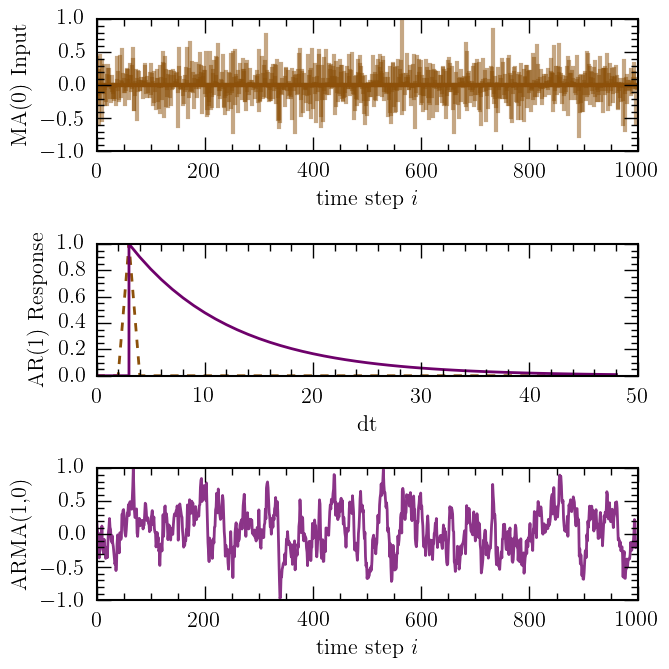

In [20]:
np.random.seed(1)
n_samples = int(1000)

ar1 = 0.9
ar2 = 0.5
w = np.random.normal(size=n_samples, scale=1.)
x = np.zeros(shape=n_samples)
x2 = np.zeros(shape=n_samples)
xMA = np.zeros(shape=n_samples)


x[0]= w[0]
x2[0]= w[0]
xMA[0]= w[0]

for j in range(1,n_samples):
    x[j] = w[j] + ar1*x[j-1]
    x2[j] = w[j] + ar2*x2[j-1]
    xMA[j] = w[j] + ar2*xMA[j-1] -0.5*w[j-1]



    
t1 = np.array([0,1,2,3,3,4,5,6,7,8,9])
t2 = np.linspace(10,1000,num=n_samples-10)
t =  np.concatenate((t1,t2))

#Just a single shock in 4th epoch
#epsilon = np.array([0,0,0,1,0,0,0,0,0,0])
epsilon1 = np.array([0,0,0,0,1,0,0,0,0,0,0])
epsilon2 = np.zeros(len(t2))
epsilon = np.concatenate((epsilon1,epsilon2))



#Placeholder for flux values
state = np.zeros(len(epsilon))
#offset helps view that the impulse happens and the AR processes change instantanelously

state = np.zeros(len(epsilon))
state2 = np.zeros(len(epsilon))
X = np.zeros(len(epsilon))
for i in range(n_samples):
    state[i] = ar1*state[i-1]+epsilon[i]
    state2[i] = ar2*state2[i-1]+epsilon[i]
    #X[i] = 0.9*X[i-1]-0.5*X[i-2]+epsilon[i]
    
    
    
plt.subplot(3,1,1)
markerline, stemlines, baseline  = plt.stem(np.arange(n_samples), w/np.max(w), linefmt="-", markerfmt=" ")
plt.setp(stemlines, 'color',"#8c510a",linewidth = 3, alpha = 0.5)
plt.scatter(0,2. ,color = "#8c510a", label = r"Input $= \epsilon_{t}$")
plt.plot([0,1000],[0,0], color = '#8c510a', linewidth=2)
plt.ylim(-1,1)
plt.xlim(0,len( w[:]))
plt.ylabel("MA(0) Input")
plt.xlabel("time step $i$")
#plt.legend(loc = "upperright", markerscale = 0)
plt.subplot(3,1,2)
plt.plot(t[1:50]-1,epsilon[0:50-1],'--', color = '#8c510a',linewidth = 2)
plt.plot(t[:50],state[:50], color = '#6e016b',label = r"$\phi_1 = 0.9$", linewidth = 2)
plt.ylabel("AR(1) Response")
plt.xlabel("dt")
plt.subplot(3,1,3)
plt.plot(np.arange(n_samples), x/np.max(x), color = '#6e016b',alpha = 0.8,label = r"$\phi_1 = 0.9$", linewidth = 2) 
plt.ylabel("ARMA(1,0)")
plt.xlabel("time step $i$")
plt.tight_layout()
plt.savefig("AR1_model.pdf", dpi = 200)

In [32]:
phi1_dho = 1.9677
phi2_dho = -0.96805



AR1 = 1.96
AR2 = -0.96805


n_samples=1000
#w = np.random.normal(size=n_samples, scale=0.25)
X =  np.zeros(shape=n_samples)
X_w =  np.zeros(shape=n_samples)

input_e =  np.zeros(shape=n_samples)

input_e[10]  = np.abs(w[5]) 
dho_input =  np.zeros(shape=n_samples)

dho = np.zeros(shape=n_samples)
dho = np.random.normal(size=n_samples, scale=0.15)
dhoMA = np.zeros(shape=n_samples)
dho_w = np.zeros(shape=n_samples)

dhoMA = np.random.normal(size=n_samples, scale=0.15)
for j in range(2,n_samples):    
    dho_input[j] = w[j]-0.98888*w[j-1]
    dhoMA[j] = AR1*dhoMA[j-1]+AR2*dhoMA[j-2]+w[j]-0.98888*w[j-1]
    dho_w = AR1*dhoMA[j-1]+AR2*dhoMA[j-2]+w[j]
    
#dhoOSC = dho
for i in range(num_samples):
    X[i] = AR1*X[i-1]+AR2*X[i-2]+input_e [i]
    X_w[i] = AR1*X[i-1]+AR2*X[i-2]+w[i]

# ARMA(2,1) Input and Response

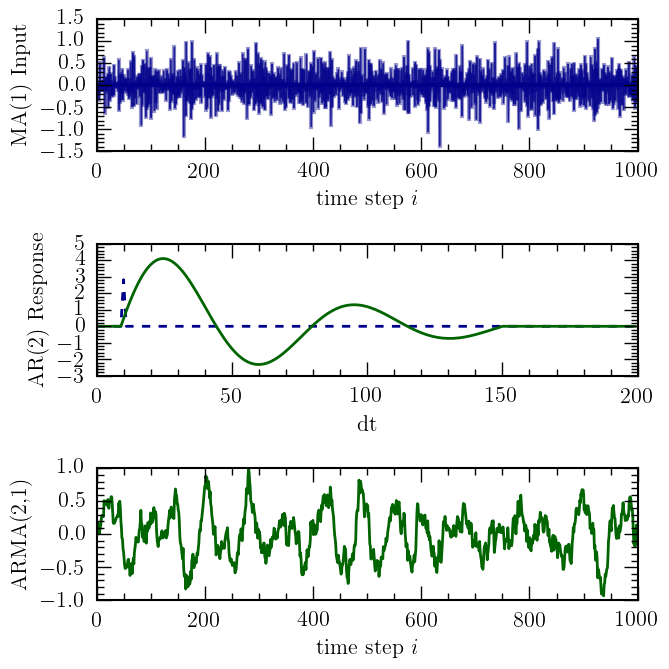

In [34]:

plt.subplot(3,1,1)
plt.ylabel("MA(1) Input")
plt.xlabel("time step $i$")
markerline, stemlines, baseline  = plt.stem(np.arange(n_samples), dho_input, color = 'darkblue', linefmt="-", markerfmt=" ")
plt.setp(stemlines, 'color',"darkblue",linewidth = 3, alpha = 0.4)
#plt.scatter(0,2. ,color = "darkblue", label = r"Input $= \epsilon_{t}$")
plt.plot([0,1000],[0,0], color = 'darkblue', linewidth=2)

plt.plot(np.arange(n_samples), dho_input, color = 'darkblue',alpha = 0.8,label = r"") 
plt.legend(loc = "upper left",handlelength = 0, frameon = False)

plt.subplot(3,1,2)  
plt.ylabel("AR(2) Response")
plt.xlabel("dt")
#plt.plot(np.arange(n_samples), X, color = '#016c59',alpha = 0.8,label = r"$\phi_1 = 0.9, \phi_2 = -0.5$",linewidth = 2) 
plt.plot(np.arange(200),input_e[0:200]*6,'--', color = 'darkblue',linewidth = 2)

plt.plot(np.arange(200), X[:200], color = 'darkgreen',alpha = 1.,label = r"",linewidth = 2) 
plt.legend(loc = "upper left",handlelength = 0,frameon = False)
plt.subplot(3,1,3) 
plt.plot(np.arange(n_samples), dhoMA/np.max(dhoMA), color = 'darkgreen',alpha = 1.,linewidth = 2) 
#plt.plot(np.arange(n_samples), dho_w/np.max(dhoMA), color = 'green',alpha = 1.,linewidth = 2) 
plt.xlabel("time step $i$")
plt.legend(loc = "upper left",handlelength = 0, frameon = False)
plt.ylabel("ARMA(2,1)")
plt.tight_layout()
plt.savefig("AR21_inputResponse.pdf", dpi = 200)

In [ ]:
# require resizing backend

In [2]:
import kali.carma

# Fixed Perturbation (fixed seed) alternating AR(2) Response parameters

In [3]:
cmap = plt.get_cmap('inferno')
c1 = cmap.colors[0]
c2 = cmap.colors[1]
rnp = len(cmap.colors)
part_colors = np.zeros((rnp, 4))
part_colors[:,3] = 0.9 # set the alpha = 0.5
part_colors[:,:3] = cmap.colors # set the particle colors to inferno

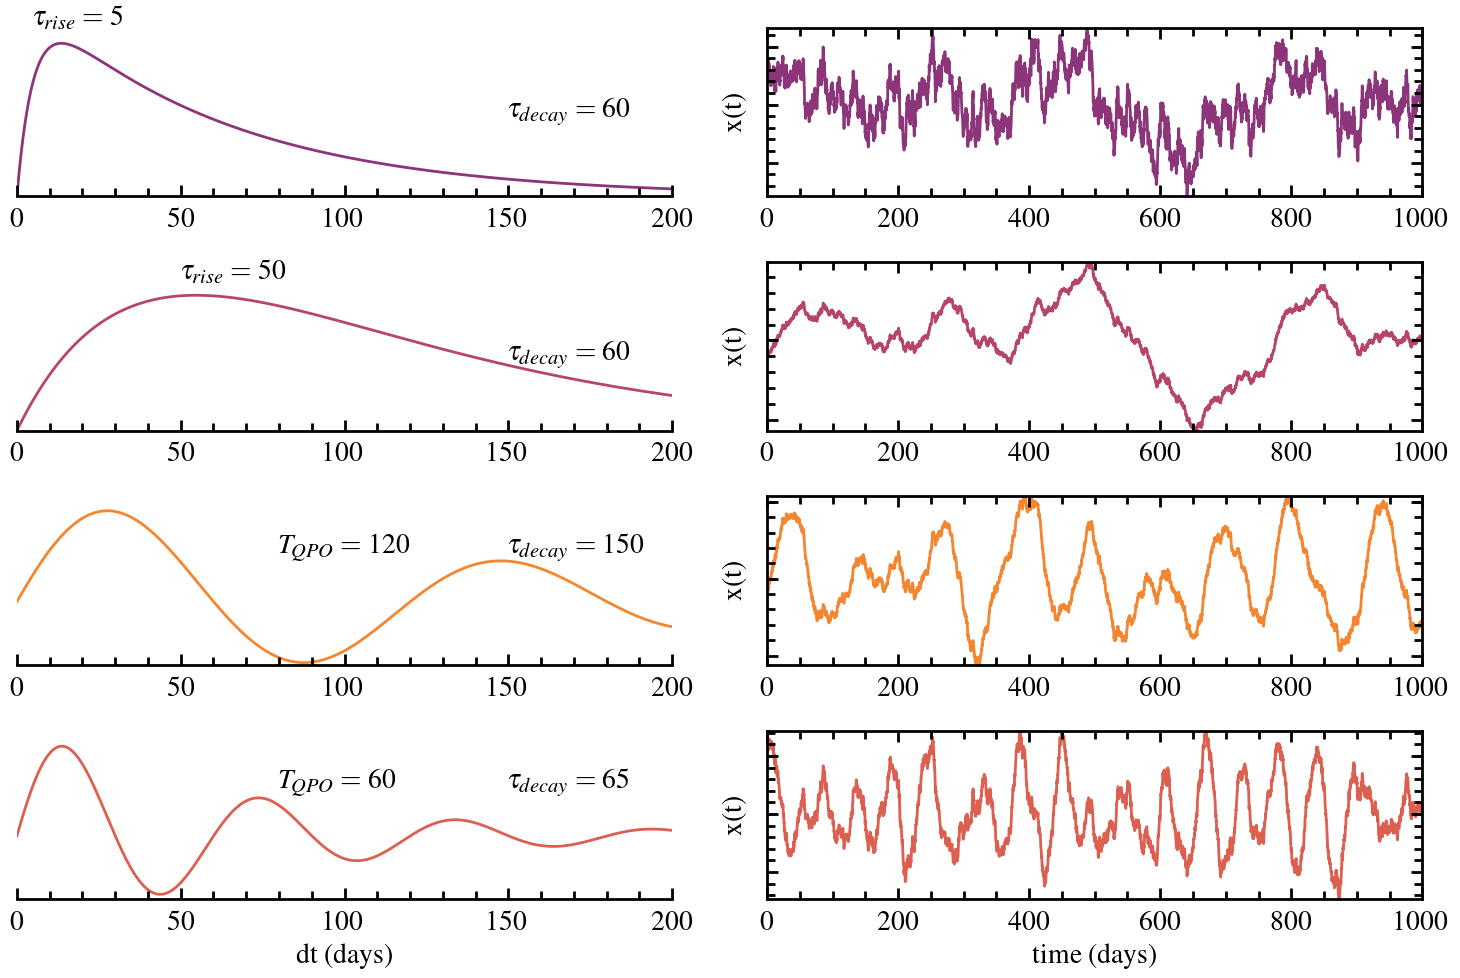

In [5]:
plt.rcParams["figure.figsize"] = (15,10)

seed = 1
r_1q2 = (-1.0/150.)+2.*3.14/120.j
r_2q2 = (-1.0/150)-2.*3.14/120.j
r_1q = (-1.0/65.)+2.*3.14/60.j
r_2q = (-1.0/65.)-2.*3.14/60.j

m_1 = (-1.0/10.5) + 0j
amp = 0.5
r_1r = (-1.0/5.)+0.j
r_2r = (-1.0/60.)-0.j
r_1r2 = (-1.0/50.)+0.j
r_2r2 = (-1.0/60.)-0.j

Length = 1000.
Rhoq = np.array([r_1q, r_2q, m_1, amp])
Thetaq = kali.carma.coeffs(2, 1, Rhoq)
Rhoq2 = np.array([r_1q2, r_2q2, m_1, amp])
Thetaq2 = kali.carma.coeffs(2, 1, Rhoq2)


Rhor = np.array([r_1r, r_2r, m_1, amp])
Thetar = kali.carma.coeffs(2, 1, Rhor)
Rhor2 = np.array([r_1r2, r_2r2, m_1, amp])
Thetar2 = kali.carma.coeffs(2, 1, Rhor2)





ax5 = plt.subplot(4,2,1)
t = np.linspace(0, 200.,1000)
Gr = (np.exp(-1/5. *t)-np.exp(-1/60. *t))/(-1/5.-(-1/60.))
plt.plot(t, Gr,c =part_colors[(2+1)*30,:] ,linewidth = 2)
plt.ylim([0, Gr.max()*1.1])
plt.text(5,Gr.max()*1.1,r"$\tau_{rise} = 5$")
plt.text(150,Gr.max()*.5,r"$\tau_{decay} = 60$")
#plt.text(200,-0.5,"200")
#plt.axis('off')
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.axes.get_yaxis().set_visible(False)
ax5.xaxis.set_ticks_position('bottom')
ax5.yaxis.set_ticklabels([])


ax6 = plt.subplot(4,2,2)
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.2,Thetar)
mhdlc2 = mhdnt2.simulate(duration=Length,burnSeed=1, distSeed=seed)
plt.plot(mhdlc2.t, mhdlc2.x,c =part_colors[(2+1)*30,:] ,linewidth = 2)
plt.ylim(mhdlc2.x.min(), mhdlc2.x.max())
plt.ylabel(r'x(t)', fontsize = 20)
#plt.xlabel(r'time (days)', fontsize = 20)
ax6.xaxis.set_major_locator(plt.MaxNLocator(6))
ax6.xaxis.set_ticklabels(["0", "200", "400", "600", "800", "1000"])
ax6.yaxis.set_major_locator(plt.MaxNLocator(3))
ax6.yaxis.set_ticklabels([])


ax7 = plt.subplot(4,2,3)
t = np.linspace(0, 200.,1000)
Gr2 = (np.exp(-1/50. *t)-np.exp(-1/60. *t))/(-1/50.-(-1/60.))
plt.plot(t, Gr2,c =part_colors[(3+1)*30,:] ,linewidth = 2)
#plt.text(0,-2.,"0")
plt.text(50,Gr2.max()*1.1,r"$\tau_{rise} = 50$")
plt.text(150,Gr2.max()*.5,r"$\tau_{decay} = 60$")
ax7.spines['right'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.axes.get_yaxis().set_visible(False)
ax7.xaxis.set_ticks_position('bottom')
ax7.yaxis.set_ticklabels([])


ax8 = plt.subplot(4,2,4)
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.2,Thetar2)
mhdlc2 = mhdnt2.simulate(duration=Length,burnSeed=1, distSeed=seed)
plt.plot(mhdlc2.t, mhdlc2.x,c =part_colors[(3+1)*30,:] ,linewidth = 2)
plt.ylim(mhdlc2.x.min(), mhdlc2.x.max())
#plt.text(1000,0,"1000")
plt.ylabel(r'x(t)', fontsize = 20)
ax8.xaxis.set_major_locator(plt.MaxNLocator(6))
ax8.yaxis.set_major_locator(plt.MaxNLocator(3))
ax8.yaxis.set_ticklabels([])
ax8.xaxis.set_ticklabels(["0", "200", "400", "600", "800", "1000"])



ax3 = plt.subplot(4,2,5)
t = np.linspace(0, 200.,1000)
Gq2 = (2.*3.14/120.)**1 *np.exp(-1/150. *t)*np.sin(2.*3.14/120. *t)
plt.plot(t, Gq2,c =part_colors[(5+1)*30,:],linewidth = 2)
plt.text(150,Gq2.max()*.5,r"$\tau_{decay} = 150$")
plt.text(80,Gq2.max()*.5,r"$T_{QPO} = 120$")
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticklabels([])


ax4 = plt.subplot(4,2,6)
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.2,Thetaq2)
mhdlc2 = mhdnt2.simulate(duration=Length,burnSeed=1, distSeed=seed)
plt.plot(mhdlc2.t, mhdlc2.x,c =part_colors[(5+1)*30,:] ,linewidth = 2)
plt.ylim(mhdlc2.x.min(), mhdlc2.x.max())
plt.ylabel(r'x(t)', fontsize = 20)
#plt.xlabel(r'time (days)', fontsize = 20)
#plt.legend(fontsize = 20)
ax4.xaxis.set_major_locator(plt.MaxNLocator(6))
ax4.xaxis.set_ticklabels(["0", "200", "400", "600", "800", "1000"])
ax4.yaxis.set_major_locator(plt.MaxNLocator(3))
ax4.yaxis.set_ticklabels([])


ax1 = plt.subplot(4,2,7)
t = np.linspace(0, 200.,1000)
Gq = (2.*3.14/60.)**1 *np.exp(-1/70. *t)*np.sin(2.*3.14/60. *t)
plt.plot(t, Gq,c =part_colors[(4+1)*30,:],linewidth = 2)
plt.text(150,Gq.max()*.5,r"$\tau_{decay} = 65$")
plt.text(80,Gq.max()*.5,r"$T_{QPO} = 60$")
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticklabels([])
plt.xlabel(r'dt (days)', fontsize = 20)




ax2 = plt.subplot(4,2,8)
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.2,Thetaq)
mhdlc2 = mhdnt2.simulate(duration=Length,burnSeed=1, distSeed=seed)
plt.plot(mhdlc2.t, mhdlc2.x,c =part_colors[(4+1)*30,:] ,linewidth = 2)
plt.ylim(mhdlc2.x.min(), mhdlc2.x.max())
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)
#plt.xlabel(r'time (days)', fontsize = 20)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_ticklabels(["0", "200", "400", "600", "800", "1000"])
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.yaxis.set_ticklabels([])


plt.tight_layout()
#plt.savefig('./triangle_samples.png', dpi = 300)

# Stability AR(2) or ARMA (2,1) triangle; Phase Diagram

In [39]:
#extract hex strings for a color map

from matplotlib.cm import inferno
infernoColors = inferno(np.arange(20))

In [40]:
import richardsplot as rplot
def rect(x,y,w,h,c):
    ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def rainbow_fill(X,Y, cmap=plt.get_cmap("inferno_r")):
    plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = float(X.size)
    dy = Y[1]-Y[0]
    Ny  = float(Y.size)

    for n, (x,y) in enumerate(zip(X,Y)):
        color = cmap(n/Ny)
        rect(x,y,-x,dy,color)
rho2z = np.linspace(-1., 0., 100)
rhoz = -np.sqrt(-4*rho2z)

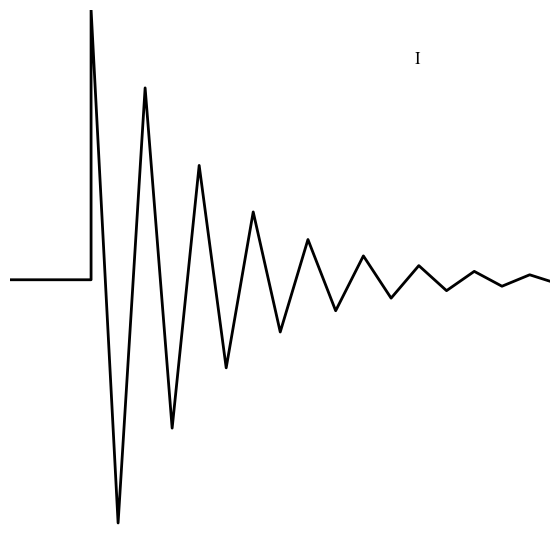

In [41]:
def plotAR2quad(ax,shocks, quad,label = "I"):
    """
    function to generate inset plots for ARMA triangle
    
    """
    
    phi = np.array([-0.9,-0.9,0.9,0.9])
    phi2 = np.array([-0.1,-0.5,-0.5,-0.1])
    shocks[0] = 4

    t1 = np.array([0,1,2,3,3,4,5,6,7,8,9])
    t2 = np.linspace(10,50,num=40)
    t =  np.concatenate((t1,t2))

    #Just a single shock in 4th epoch
    #epsilon = np.array([0,0,0,1,0,0,0,0,0,0])
    epsilon1 = np.array([0,0,0,0,1,0,0,0,0,0,0])
    epsilon2 = np.zeros(len(t2))
    epsilon = np.concatenate((epsilon1,epsilon2))
    epsilon[shocks] = 1


    #Placeholder for flux values
    X = np.zeros(len(epsilon))

    
    #offset helps view that the impulse happens and the AR processes change instantanelously
    #ax.plot(t[1:]-1,epsilon[0:-1],'--', color = '#8c510a',linewidth = 2)

    j, p = quad[0],quad[1]
    X = np.zeros(len(epsilon))
    for i in range(len(epsilon)):
        X[i] = phi[j]*X[i-1]+phi2[j]*X[i-2]+epsilon[i]
    ax.plot(t,X,color ='k', linewidth = 2, label = label)
    ax.set_xlim([0,20])
    ax.set_ylim([-1,1])
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_frame_on(False)
    ax.text(15, 0.8,label, fontsize = 12)
    #ax.set_xlabel('time')
    #ax.set_ylabel('Single Unit Impulse Distubance')
    return ax

#eample function call below
f, ax = plt.subplots() 
ax = plotAR2quad(ax,[1], [0,0], label = "I")

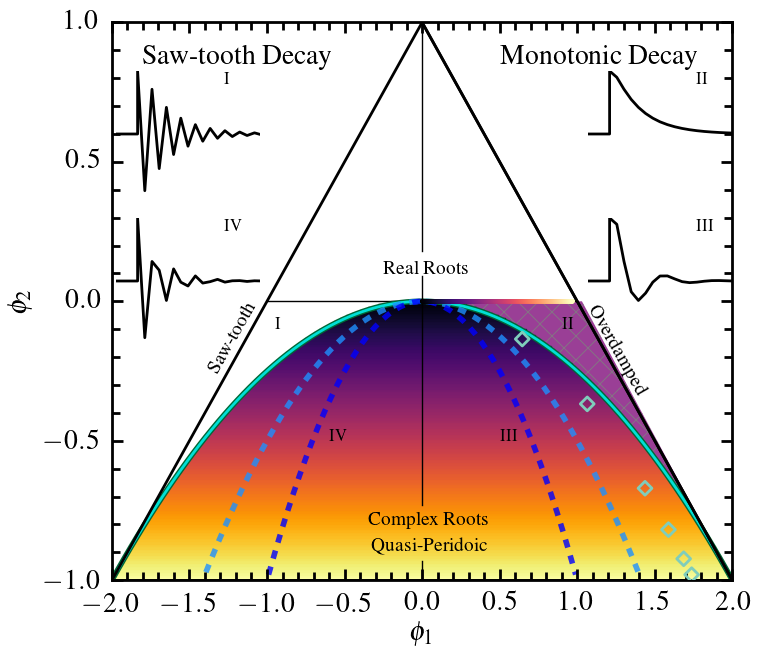

In [57]:
#fig = plt.figure()
#fig.set_figheight(25)
#fig.set_figwidth(25)
rho = np.linspace(-2., 2., 100)
rho2 = -np.square(rho)/4

rho = np.linspace(-2., 2., 100)
rho2a = -np.square(rho)/4.
rho2b = -2.*np.square(rho)/4.
rho2c = -4.*np.square(rho)/4.
#parabolaColors = ['#41b6c4','#225ea8', '#0c2c84']
parabolaColors = ['cyan','dodgerblue', 'blue']


fig,ax  = plt.subplots(1,1,figsize=(8, 7))
t = np.linspace(0,50,1000)
omega = .5
tau = np.array([100., 25., 10.,5.,2.,1.])


colorpal = ['#016c59','#31a354','#74c476','#1c9099','#67a9cf','#a6bddb','#af8dc3','#762a83']
cmap_r = colorpal[::-1]


root1 = -1./tau[:] + omega*1.j
root2 = -1./tau[:] - omega*1.j
phi_1_t = np.exp(root1)+np.exp(root2)
phi_2_t = -np.exp(root1+root2)


drwt = np.array([0.1,3.,10.,30.])
drwroot1 = -1./drwt[:] 
drwroot2 = -1./1.
drwphi_1_t = np.exp(drwroot1)+np.exp(drwroot2)
drwphi_2_t = -np.exp(drwroot1+drwroot2)

#rainbow_fill( rho,rho2)
rainbow_fill( rhoz,rho2z, cmap = plt.get_cmap('inferno_r'))
rainbow_fill( -rhoz,rho2z, cmap = plt.get_cmap('inferno_r'))

#line down the middle of the trianlge with gaps
plt.plot([0,0],[1,0.18],color = 'k',linewidth = 1,zorder =5)
plt.plot([0,0],[0.09,-0.73],color = 'k',linewidth = 1,zorder =5)
plt.plot([0,0],[-0.93,-1],color = 'k',linewidth = 1,zorder =5)

#triangle outline
plt.plot([0,2],[1,-1],color = 'k',linewidth = 2,zorder = 13 )
plt.plot([0,2],[1,-1],color = 'k',linewidth = 2,zorder = 12)
plt.plot([0,-2],[1,-1],color = 'k',linewidth = 2,zorder = 11)
plt.plot([-2,2],[-1,-1],color = 'k',linewidth = 2)
plt.plot([-1,1],[0,0],color = 'k', linewidth = 1)

#drw line with gradient for decay timescale
plt.scatter(np.linspace(0,0.97,1000),np.zeros(shape =1000),s = 10,c=np.linspace(0,0.97,1000),cmap = 'magma',linewidth =0, zorder = 10)
plt.plot(rho, rho2, c = '#006837',linewidth = 4)
#intersecting parabolas
plt.plot(rho[rho2a > -1], rho2a[rho2a > -1], c = parabolaColors[0],alpha = 0.8,linewidth = 2)
plt.plot(rho[rho2b > -1], rho2b[rho2b > -1],"--", c = parabolaColors[1],alpha = 0.8,linewidth = 4)
plt.plot(rho[rho2c > -1], rho2c[rho2c > -1], "--",c = parabolaColors[2],alpha = 0.8,linewidth = 4)

#overdamped region fill
fillcurve = np.zeros(shape =50 )
tridown = np.linspace(1.,2., 25)
fillcurve[25:] = -tridown+1.
plt.fill_between(rho[50:],fillcurve, rho2[50:] ,facecolor="#810f7c",alpha = 0.8, hatch="X", edgecolor="grey", linewidth=0.0)

#Annotations
plt.text(0.5, 0.85, 'Monotonic Decay',  fontsize = 20,zorder = 20)
plt.text(-1.8, 0.85, 'Saw-tooth Decay', fontsize = 20, zorder = 20)
plt.text(-0.35, -0.8, 'Complex Roots', zorder = 20,fontsize = 14)
plt.text(-0.33, -0.9, 'Quasi-Peridoic',fontsize = 14)
plt.text(-0.25, 0.1, 'Real Roots', zorder = 20,fontsize = 14)
plt.text(1.05, -0.05, 'Overdamped',rotation=-60.5,fontsize = 14)
plt.text(-1.4, -0.04, 'Saw-tooth',rotation=60.5,fontsize = 14)


#labelling quardants
plt.text(-0.6, -0.5, 'IV',fontsize = 12)
plt.text(0.5, -0.5, 'III',fontsize = 12)
plt.text(-0.95, -0.1, 'I',fontsize = 12)
plt.text(0.9, -0.1, 'II',fontsize = 12)

#samples for response curves in figure 2
for i in range (len(phi_1_t.real)): 
    ax.scatter(phi_1_t[i], phi_2_t[i], c = "None",s = 50,marker = "D",edgecolors = "#7fcdbb",linewidth = 2,
               label = r'$\tau_{damp} = %.0f$'%(tau[i]),zorder = 10)
#legend1 = plt.legend(loc = 'upper left',scatterpoints = 1)
#for i in range (len(drwphi_1_t.real)):     
 #   ax.scatter(drwphi_1_t[i], drwphi_2_t[i], c = cmap_r[i],s = 50,marker = "D",linewidth = 0,edgecolors = None,
  #             label = r'$\tau_{rise} = %.1f$'%(drwt[i]),zorder = 10)
    
plt.xlim([-2, 2])
plt.ylim([-1, 1.])
plt.xlabel(r'$\phi_{1}$', fontsize = 20)
plt.ylabel(r'$\phi_{2}$', fontsize = 20)


#inset responses in each quadrant
#left, bottom, width, height] 
axinsetR = plt.axes([0.76,0.69,.18,.18])
axinsetL = plt.axes([0.17,0.69,.18,.18])
axinsetR_b = plt.axes([0.76,0.48,.18,.18])
axinsetL_b = plt.axes([0.17,0.48,.18,.18]) 
plotAR2quad(axinsetL,[1], [0,0], label = "I")
plotAR2quad(axinsetL_b,[1], [1,1], label = "IV")
plotAR2quad(axinsetR,[1], [3,3], label = "II")
plotAR2quad(axinsetR_b,[1], [2,2], label = "III")

plt.tight_layout()
plt.savefig('armaTriangle.pdf', dpi = 300)


# Green Diamond Samples in Complex plane 

0.251128704514
(0.25132741228718347, 0.25152627728921662)
0.248203536244
(0.25132741228718347, 0.25449060526269313)
0.233521376221
(0.25132741228718347, 0.27049116097752973)
0.196658418677
(0.25132741228718347, 0.32119381713689932)


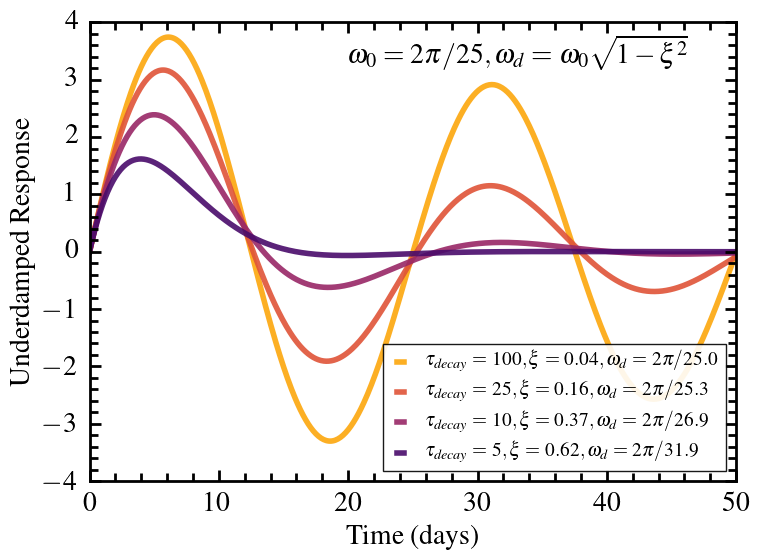

In [151]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(10)
cmap = plt.get_cmap('inferno_r')

c1 = cmap.colors[0]
c2 = cmap.colors[1]

rnp = len(cmap.colors)

part_colors = np.zeros((rnp, 4))
part_colors[:,3] = 0.9 # set the alpha = 0.5
part_colors[:,:3] = cmap.colors # set the particle colors to inferno

t = np.linspace(0,1000, 10000)
fig,ax  = plt.subplots(1,1,figsize=(8, 6))
tau = np.array([100., 25., 10.,5.,2.,1.])
omega = 2*np.pi/25.
j = 0
for i, decay in enumerate(tau[:-2]): 
    Rho = np.array([complex((-1./decay)+(omega)*1.j), complex((-1./decay)-(omega)*1.j),(-1./5), 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    damp = Theta[0]/(2*np.sqrt(Theta[1]))

    #omega1 = np.sqrt(Theta[1])
    omega1 = omega*np.sqrt(1-damp**2)

    print(omega*np.sqrt(1-damp**2))
    newT =2*np.pi/omega1
    print(omega,(np.sqrt(Theta[1])))
    plt.plot(t,1/omega1*np.exp(-1/decay*t)*np.sin(omega1*t),color=part_colors[(i+1)*50,:], lw=4,
             label = r"$\tau_{decay}=%.0f,\xi=%.2f, \omega_d=2\pi/%.1f$"%(decay, damp,newT ) )
    j = j+1
    #ax.scatter(phi_1_t[i], phi_2_t[i], c = colorpal[i],linewidth = 4, zorder = 10)
#plt.plot(t,drw, c = colorpal[-1],linewidth = 4)
plt.text(20,3.2, r'$\omega_0 = 2\pi/25, \omega_d =\omega_0\sqrt{1-\xi^2}$', fontsize=20)
plt.ylabel(r'Underdamped Response', fontsize = 20)
plt.xlabel(r'Time (days)', fontsize = 20)
plt.xlim([0,50])
plt.ylim([-4,4])
plt.legend(fontsize = 14,loc = 'lower right', handlelength = 1, framealpha = 0.9)
plt.tight_layout()


#plt.savefig('DHO_response.pdf',dpi = 300)


# Samples of ARMA(2,1) Response in Real Plane Only

3
2
2
3


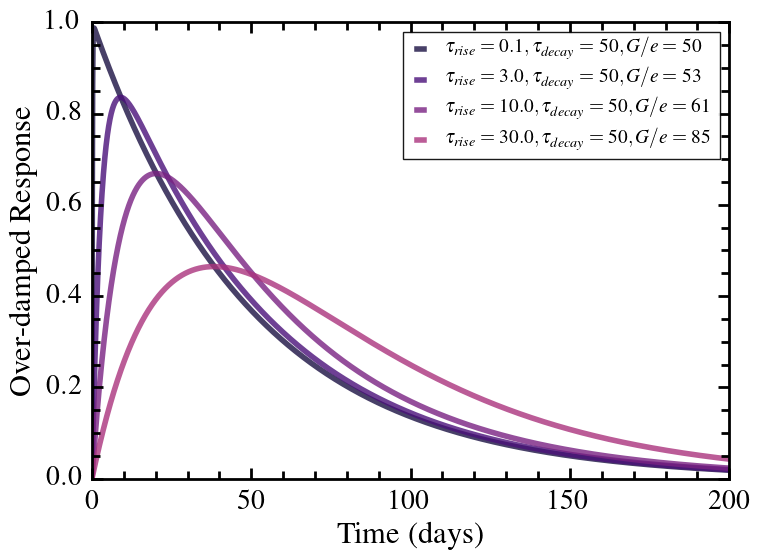

In [146]:
#fig = plt.figure()
#fig.set_figheight(15)
#fig.set_figwidth(15)

cmap = plt.get_cmap('magma')
c1 = cmap.colors[0]
c2 = cmap.colors[1]
rnp = len(cmap.colors)
part_colors = np.zeros((rnp, 4))
part_colors[:,3] = 0.9 # set the alpha = 0.5
part_colors[:,:3] = cmap.colors # set the particle colors to inferno

drwt = np.array([0.1,3.,10.,30.])
fig,ax  = plt.subplots(1,1,figsize=(8, 6))
t = np.linspace(0,200,10000)
for i, decay in enumerate(drwt): 
    norm = .02
    drw = (np.exp(-1/50. *t)-np.exp(-1/decay *t))/(50.- decay)
    efold = np.where(np.isclose(drw[drw.argmax():] , drw.max()/np.exp(1), 1e-3)==True)[0]
    
    if len(efold)>1:
        efold = np.where(np.isclose(drw[drw.argmax():] , drw.max()/np.exp(1), 5e-4)==True)[0]
    print(len(efold))    
    tefold = np.mean(t[efold])
    plt.plot(t,drw/norm,color=part_colors[(i+1)*30,:], lw=4, alpha = 0.8, 
             label = r"$\tau_{rise} =%.1f,\tau_{decay} = 50, G/e = %.f$"%(decay,tefold))
#plt.text(140,.9, 'Decay Timescale  = 50 days', fontsize=20)    
plt.ylabel(r'Over-damped Response', fontsize = 22)
plt.xlabel(r'Time (days)', fontsize = 22)
plt.legend(fontsize = 14,loc = 'upper right', handlelength = 1, framealpha = 0.9)

plt.tight_layout()
plt.savefig('./overdampedResponse.pdf', dpi = 200)

# Overdamped Systems: alpha_2 not a reliable predictor of osc freq omega

In [168]:
import cmath

(-0.00198642088022-0.0628318530718j)
omega
(0.06283185307179587, 0.063030482787582581, (0.062633849303364283+0j))
Period
(99.99999999999999, (100.31612901112393+0j), 99.684867215032895)
ratio
(1.0031612901112394, (0.079326696843658534+0j))
(-0.00202392088022-0.0628318530718j)
omega
(0.06283185307179587, 0.063622651315673281, (0.062050884060897385+0j))
Period
(99.99999999999999, (101.2585944950148+0j), 98.75704921513919)
ratio
(1.012585944950148, (0.15717672547758985+0j))
(-0.00206280976911-0.0628318530718j)
omega
(0.06283185307179587, 0.064230985810693586, (0.061463197405550042+0j))
Period
(99.99999999999999, (102.22678891437273+0j), 97.821716853262458)
ratio
(1.0222678891437273, (0.20758413038576648+0j))
(-0.00217392088022-0.0628318530718j)
omega
(0.06283185307179587, 0.065938166189512301, (0.059871876768445249+0j))
Period
(99.99999999999999, (104.94385087475767+0j), 95.289051398868736)
ratio
(1.0494385087475766, (0.30331447105335285+0j))
(-0.00277392088022-0.0628318530718j)
omega
(0.

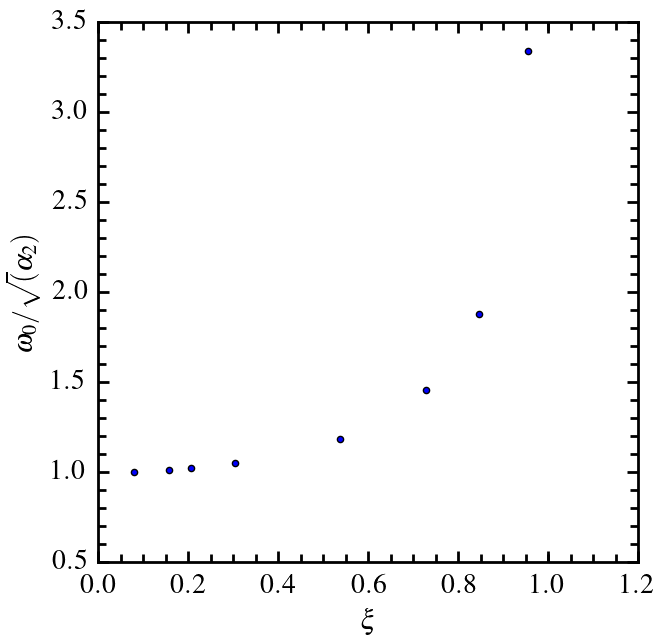

In [175]:
t = np.linspace(0,1000, 10000)
tau = np.array([200,100.,75, 50, 25.,15, 10.,5.,2.,1.])
omega = 2*np.pi/100.
j = 0
for i, decay in enumerate(tau[:-2]): 
    Rho = np.array([complex((-1./decay)+(omega)*1.j), complex((-1./decay)-(omega)*1.j),(-1./5), 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    damp = Theta[0]/(2*cmath.sqrt(Theta[1]))
    r1 = (-Theta[1]/2.+cmath.sqrt(Theta[0]**2 /4.-Theta[1]))
    r2 = (-Theta[1]/2.-cmath.sqrt(Theta[0]**2 /4.-Theta[1]))
    print(r2)
    omega1 = omega*np.sqrt(1-damp**2)
    print("omega")
    print(omega,np.sqrt(Theta[1]),omega1)
    newT =2*np.pi/omega1
    print("Period")
    print((2.*np.pi/omega), newT, 2*np.pi/(np.sqrt(Theta[1]))) 
    print("ratio")
    ratio = (2.*np.pi/omega)/(2.*np.pi/(np.sqrt(Theta[1])))
    print((2.*np.pi/omega)/(2.*np.pi/(np.sqrt(Theta[1]))), damp)
    plt.scatter(damp, ratio) 
    plt.ylabel(r"$\omega_{0}/\sqrt(\alpha_{2})$",fontsize = 20)
    plt.xlabel(r"$\xi$", fontsize = 20)

# rise + decay timescale ~ time @ Green Function max 

(-1.0, 2.4075702898313631)
(-5.0, 8.6682143078368306)
(-10.0, 14.561875090333723)
(-20.0, 23.845869848001229)
(-50.0, 43.685625271001172)
(-100.0, 66.32333477867293)


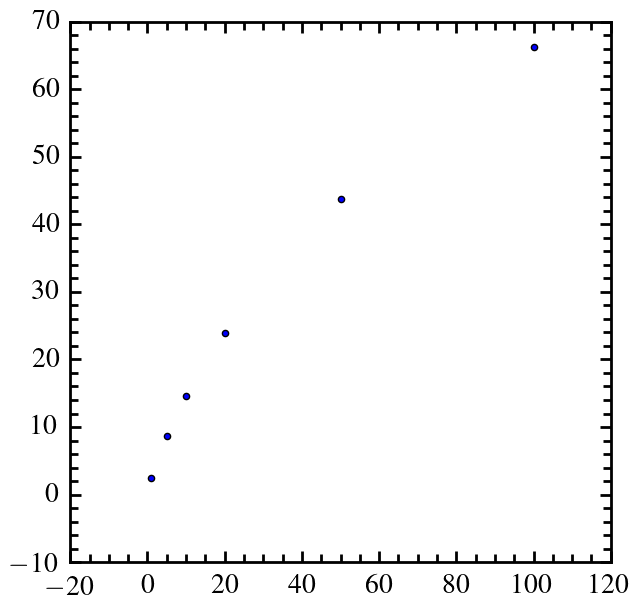

In [181]:
t = np.linspace(0,1000, 10000)
tau = np.array([1,5,10, 20,50,100])
rise = 250
for i, decay in enumerate(tau[:]): 
    Rho = np.array([(-1./decay), (-1./rise),(-1./5), 1.0])
    Theta = kali.carma.coeffs(2, 1, Rho)
    r1 = Rho[1]
    r2 = Rho[0]
    Green = 1/(r2-r1)*np.log10(r1/r2)
    print(1/min(r1,r2), Green)
    plt.scatter(-1/min(r1,r2), Green)

# See CARMA figures file of final updated versions

In [236]:
import pdb
import os as os
import random
import numpy as np
import kali.csvLC
#import kali.s82
import kali.carma

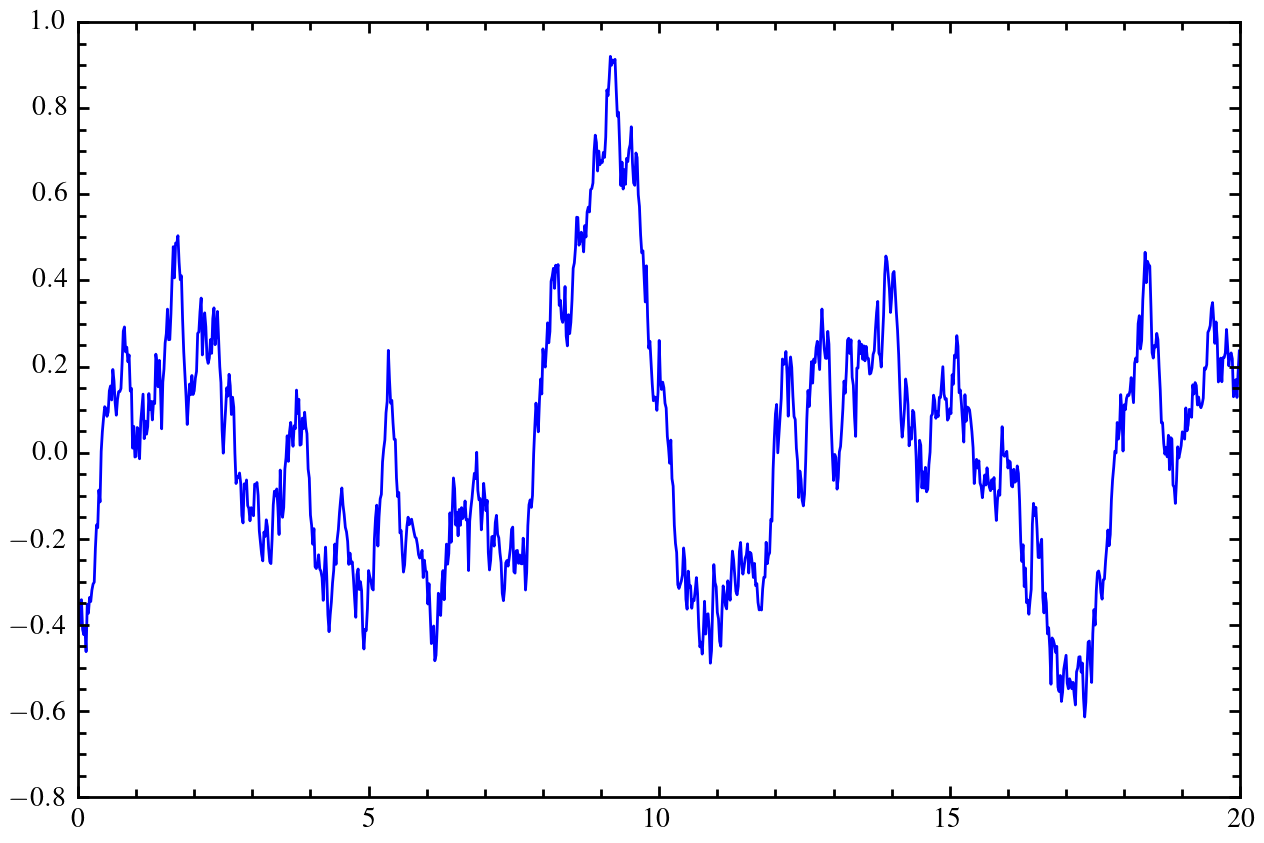

In [274]:
mhdVector = np.array([ 2*omega*0.5,  omega**2,  0.243968 , 0.36025]).copy(order='C')
mhdnt = kali.carma.CARMATask(2, 1)
mhdnt.set(0.02,mhdVector)
mhdlc = mhdnt.simulate(duration=20.0)
plt.plot(mhdlc.t, mhdlc.x)

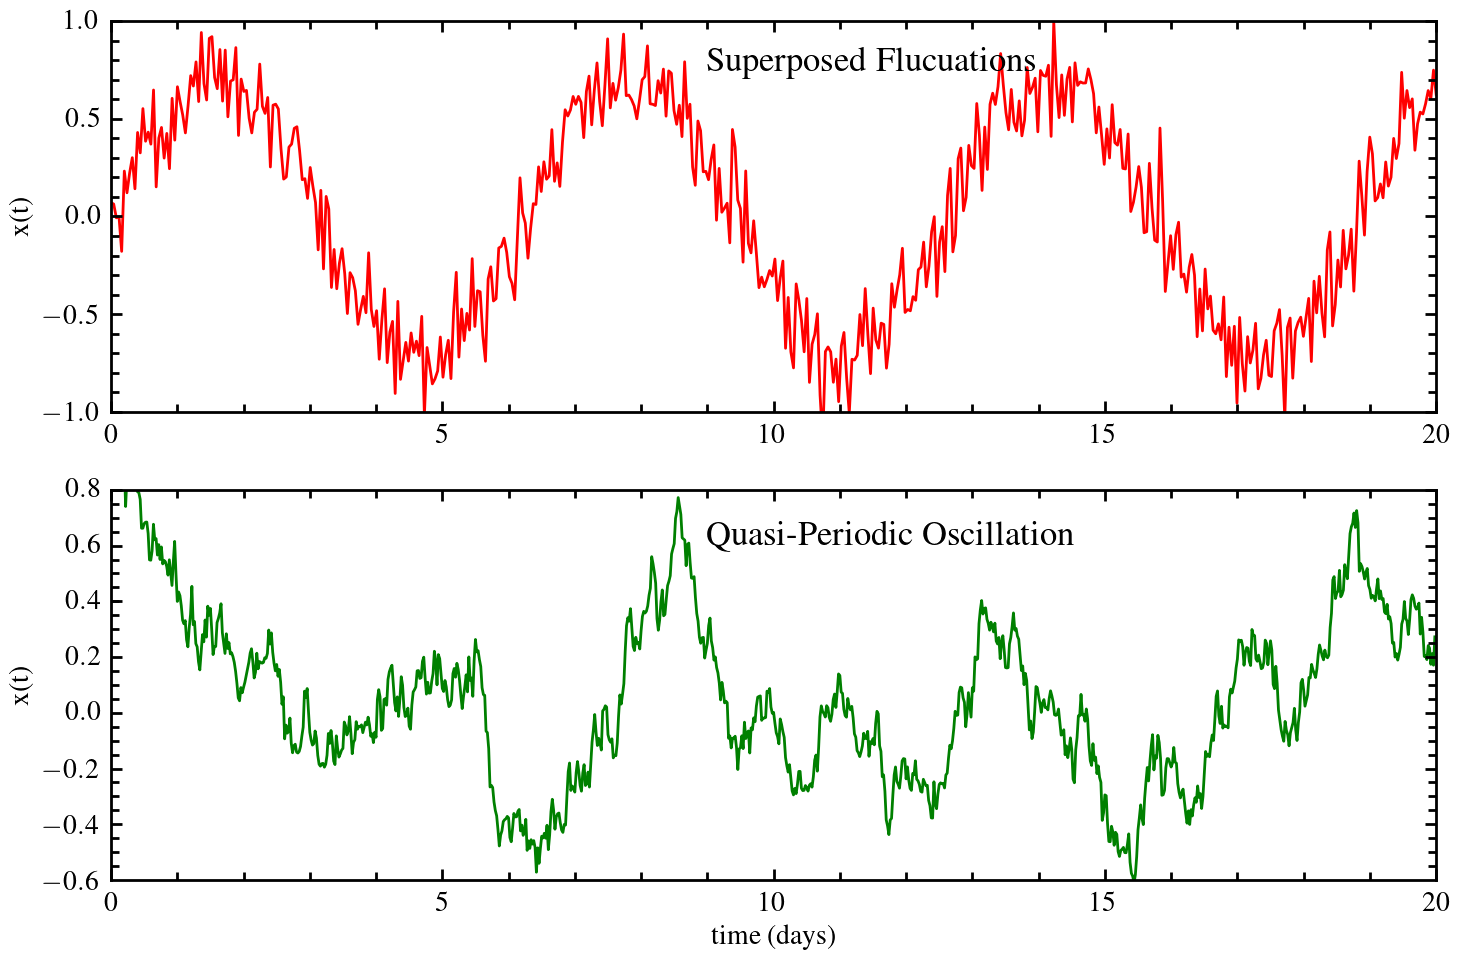

In [543]:
fig.set_figheight(10)
fig.set_figwidth(10)
plt.subplot(2,1,1)
n_samples = 500
t = np.linspace(0,20.,n_samples)
omega = 1.
offset = np.random.normal(size=n_samples, scale=0.2)
sup_fluc = np.sin(omega*t ) + offset
qpoCurve = np.sin(omega*t + offset*3.)

plt.plot(t,sup_fluc/sup_fluc.max(),c ='red' ,linewidth = 2, alpha = 1.)
plt.ylim(-1,1)
plt.text(9,.75, 'Superposed Flucuations', fontsize=25)    

plt.ylabel(r'x(t)', fontsize = 20)
plt.subplot(2,1,2)
plt.plot(mhdlc.t, mhdlc.x,c ='green' ,linewidth = 2)
plt.text(9,.6, 'Quasi-Periodic Oscillation', fontsize=25)    
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)
plt.tight_layout()
plt.ylim(-0.6,0.8)
plt.savefig('./superposedFlucuations.pdf', dpi = 300)

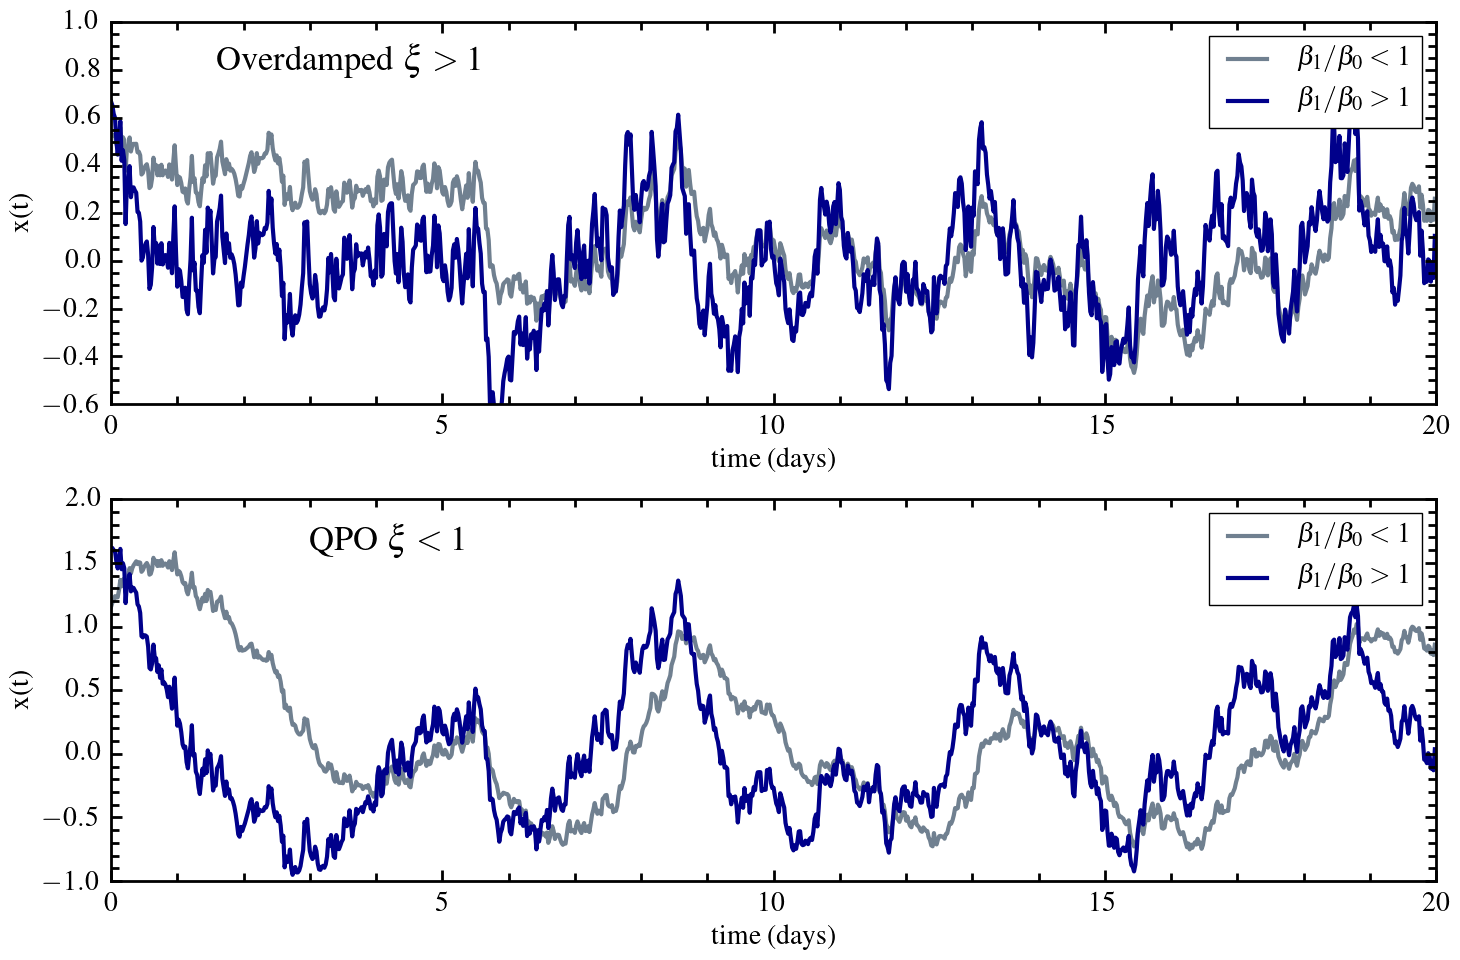

In [569]:
damp = 0.3
omega = 1.
#white
mhdVector = np.array([ 2*omega*damp,  omega**2,  0.6, 0.3]).copy(order='C')
dampedVector = np.array([ 2*omega*damp*5.,  omega**2,  0.6 , 0.3]).copy(order='C')

mhdnt = kali.carma.CARMATask(2, 1)
mhdnt.set(0.02,mhdVector)
mhdlc = mhdnt.simulate(duration=20.0,burnSeed=1, distSeed=1)
nt = kali.carma.CARMATask(2, 1)
nt.set(0.02,dampedVector)
lc = nt.simulate(duration=20.0,burnSeed=1, distSeed=1)

#blue
mhdVector2 = np.array([ 2*omega*damp,  omega**2,  0.01 , 0.6]).copy(order='C')
dampedVector2= np.array([ 2*omega*damp*5.,  omega**2,  0.01, 0.6]).copy(order='C')
mhdnt2 = kali.carma.CARMATask(2, 1)
mhdnt2.set(0.02,mhdVector2)
mhdlc2 = mhdnt2.simulate(duration=20.0,burnSeed=1, distSeed=1)
nt2 = kali.carma.CARMATask(2, 1)
nt2.set(0.02,dampedVector2)
lc2 = nt2.simulate(duration=20.0,burnSeed=1, distSeed=1)



plt.subplot(2,1,1)
plt.plot(lc.t, lc.x,c ='slategrey',linewidth = 3,  label = r"$\beta_1/\beta_0 < 1$")
plt.plot(lc2.t, lc2.x,c ='darkblue',linewidth = 3, label = r"$\beta_1/\beta_0 > 1$")
plt.text(1.6,.8, r"Overdamped $\xi > 1$", fontsize=25) 

plt.ylim([-0.6,1])
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)
plt.legend(fontsize = 20)

plt.subplot(2,1,2)
plt.plot(mhdlc.t, mhdlc.x,c ='slategrey' ,linewidth = 3, label = r"$\beta_1/\beta_0 < 1$")
plt.plot(mhdlc2.t, mhdlc2.x,c ='darkblue' ,linewidth = 3, label = r"$\beta_1/\beta_0 > 1$")
plt.ylabel(r'x(t)', fontsize = 20)
plt.xlabel(r'time (days)', fontsize = 20)

plt.text(3,1.6, r"QPO $\xi < 1$", fontsize=25) 


plt.legend(fontsize = 20)
plt.tight_layout(h_pad=0.5)
plt.savefig('./CARMA21.pdf', dpi = 300)